# Plotting pt distributions and differences/ratios of mus

## (gen-match efficiency at the bottom)

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities) 

plt.style.use(hep.style.CMS) # plotting style defined as CMS style

In [2]:
# Following are the 6 different root files used in the first method of processing
# samples = [
#     "2Mu2E_100GeV_5GeV_400mm",
#     "2Mu2E_100GeV_5GeV_200mm",
#     "2Mu2E_100GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_100GeV_5GeV_0p4mm",
# ]

# samples = [
#     "2Mu2E_800GeV_1p2GeV_1p2mm",
#     "2Mu2E_800GeV_0p25GeV_1p2mm",
# ]

# samples = [
#     "2Mu2E_1000GeV_5GeV_40mm",
#     "2Mu2E_500GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_40mm",
# ]

samples = [
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_5GeV_2mm",
    "2Mu2E_500GeV_5GeV_0p8mm",
    "2Mu2E_800GeV_5GeV_0p5mm",
    "2Mu2E_1000GeV_5GeV_0p4mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:

ch = "2mu2e"
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        "2mu2e_matchedLj"
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

ch1 = "2mu2e"
ch2 = "2mu2e_matchedLj"

Output()

Output()

# pt distributions

## all genMus:

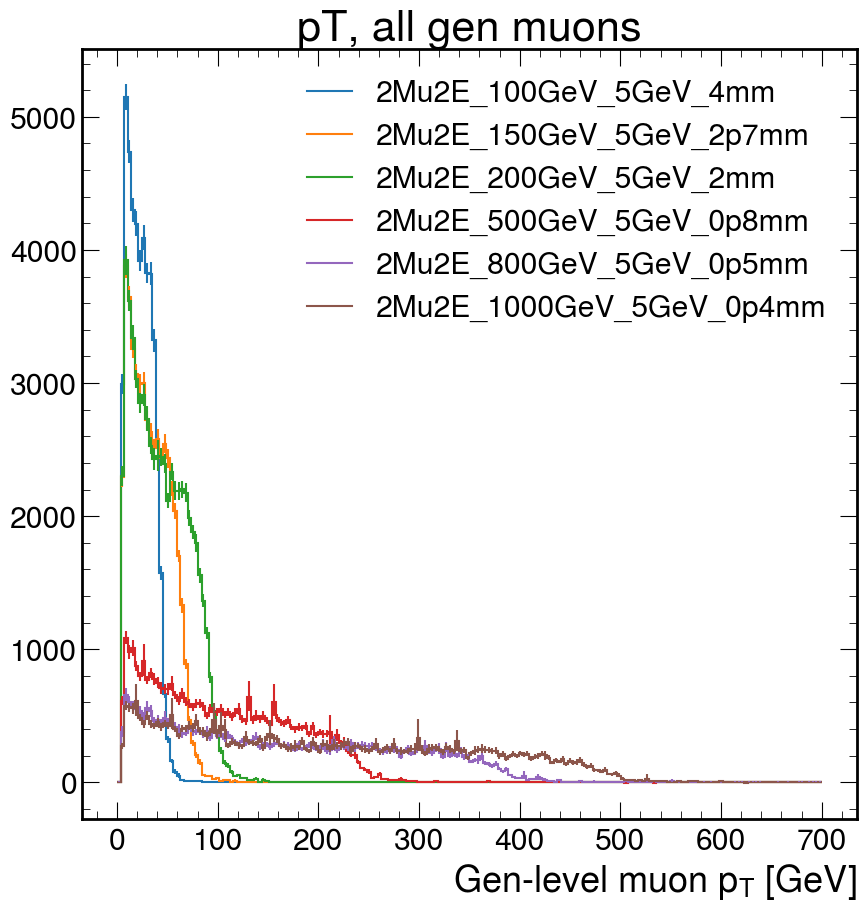

In [4]:
for S in samples:
    output["out"][S]["hists"]["genMu_pt_highRange"][ch1,:].plot(density=False, flow='none')

plt.title("pT, all gen muons")
plt.legend(samples)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


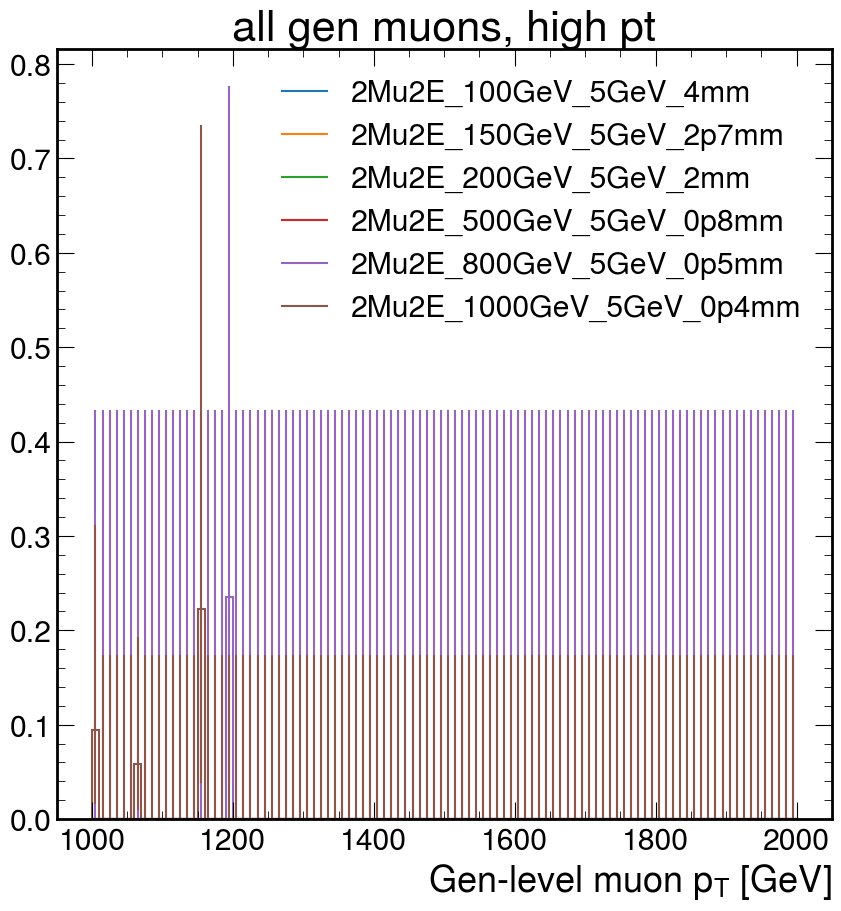

In [12]:
for S in samples:
    output["out"][S]["hists"]["genMu_highpt"][ch1,:].plot(density=False, flow='none')

plt.title("all gen muons, high pt")
plt.legend(samples)

Not wholly unexpected to see an occasional highpT gen muon. Also the counts are fractional (even with density=False) because of weights applied to the simulated events.

## leading genMu

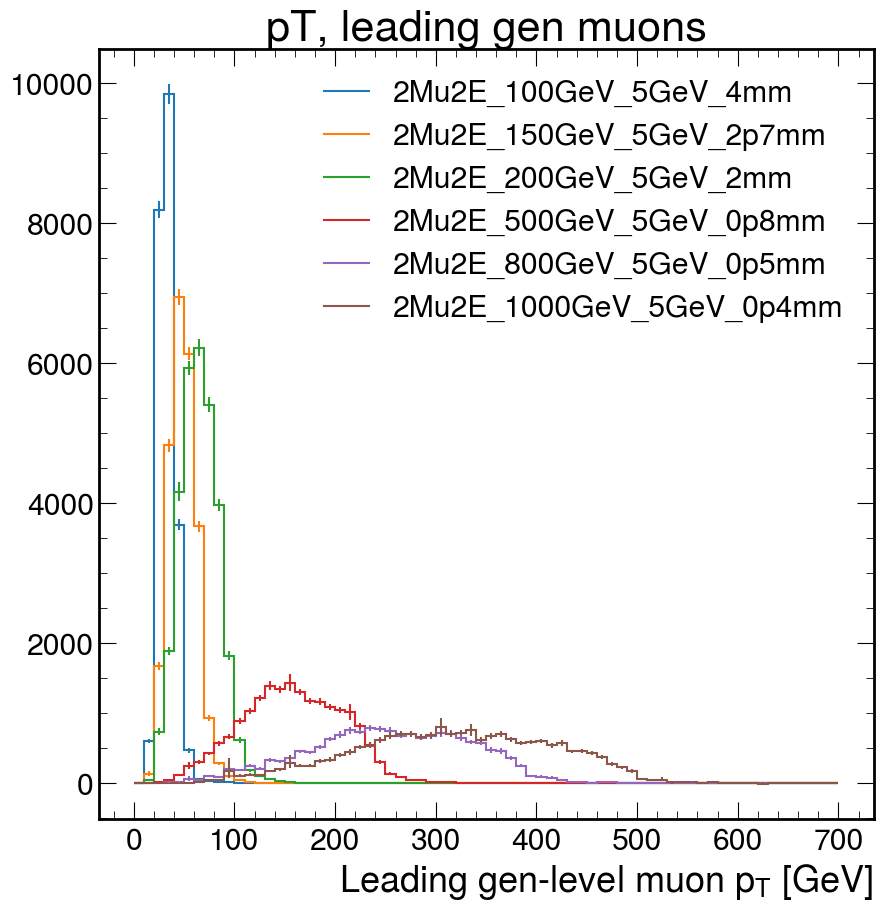

In [6]:
for S in samples:
    output["out"][S]["hists"]["genMu0_pt_highRange"][ch1,:].plot(density=False, flow='none')
# "genMu0_pt" (for regular)
# "genMu0_pt_highRange" (to zoom in on [0:200] range)

plt.title("pT, leading gen muons")
plt.legend(samples)

## subleading genMu:

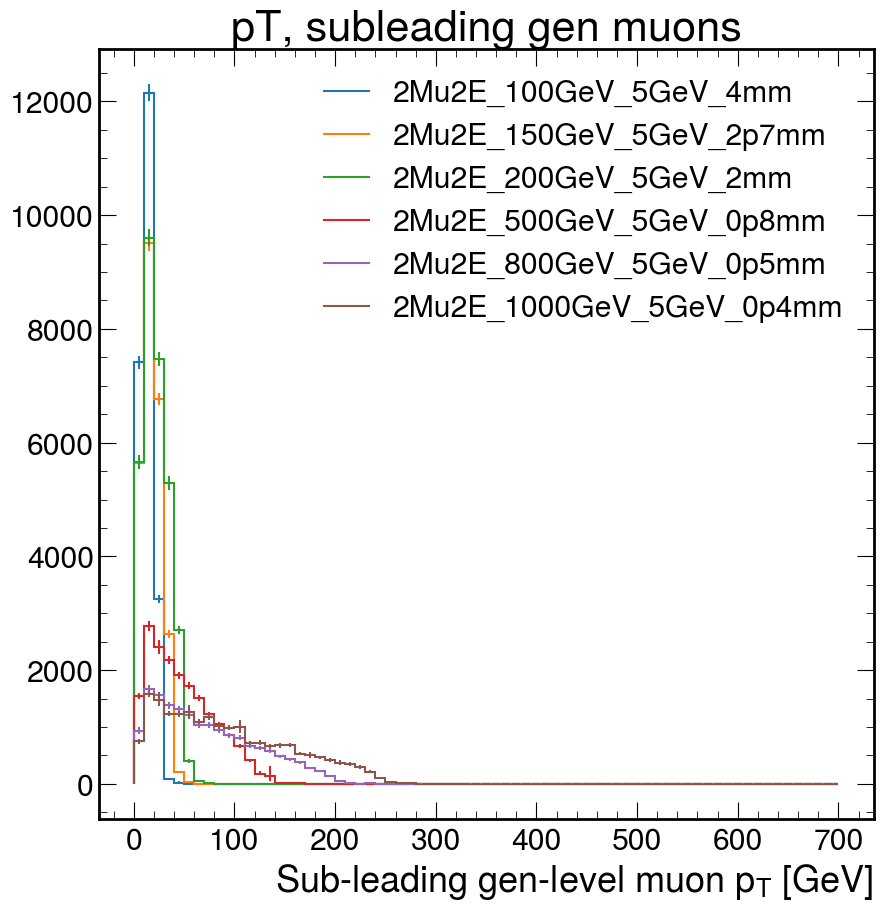

In [7]:
for S in samples:
    output["out"][S]["hists"]["genMu1_pt_highRange"][ch1,:].plot(density=False, flow='none')
# "genMu0_pt" (for regular)
# "genMu0_pt_highRange" (to zoom in on [0:200] range)

plt.title("pT, subleading gen muons")
plt.legend(samples)

## (ptg - ptr) / ptg:

for S in samples:
    output["out"][S]["hists"]["ljMu_genMu_ptRatio"][ch1,:].plot(density=False, flow='none')

plt.title("(ptg - ptr) / ptg in the SIDM signal")
plt.ylabel("counts")


This is (ptg - ptr) / ptg  , or 1 - ptRatio  (using every lepton-jet object)    
"1 - derived_objs["mu_ljs"](objs).pt / derived_objs["mu_ljs"](objs).nearest(objs["genMus"]).pt"

# Reco pT distributions:

## All reco mus

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


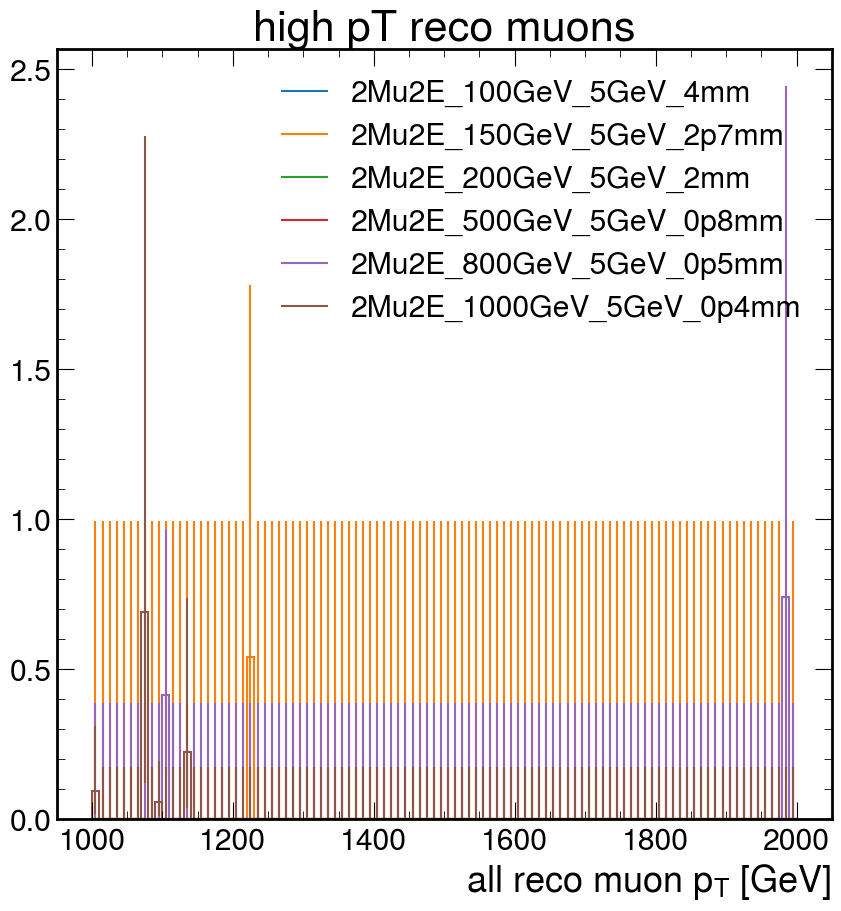

In [8]:
for S in samples:
    output["out"][S]["hists"]["muon_highpt"][ch1,:].plot(density=False, flow='none')
# "muon_pt" (to zoom in on [0:200] range)
# "muon_highpt" (to look at [1000:2000] range)

plt.title("high pT reco muons")
plt.legend(samples)

## DSA muons

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


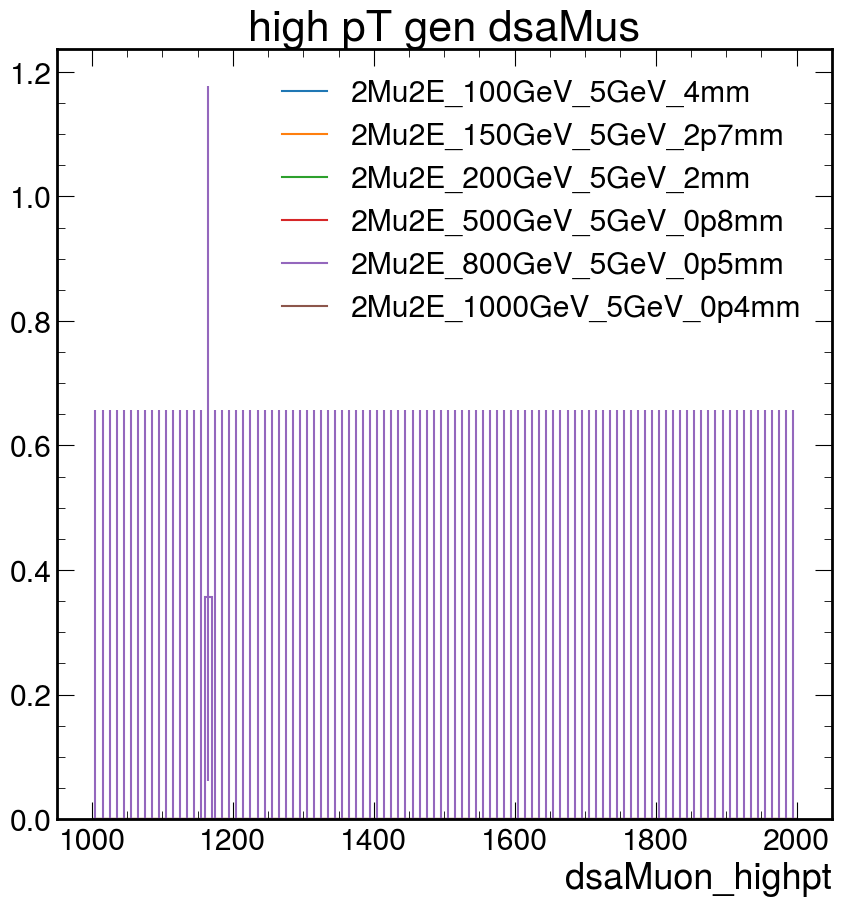

In [9]:
for S in samples:
    output["out"][S]["hists"]["dsaMuon_highpt"][ch1,:].plot(density=False, flow='none')
# "genMu0_pt" (for regular)
# "genMu0_pt_highRange" (to zoom in on [0:200] range)

plt.title("high pT gen dsaMus")
plt.legend(samples)

# gen-matching efficiency

# $\epsilon = \frac{\text{Events with both gen muons matched to reco muons}}{\text{Total events with 2 gen muons}}$
<br>

## I'm using the pt of the dark photon for num and den

In [10]:
#ch1 = 2mu2e
#ch2 = 2mu2e_matchedLj
sample = samples[0]

output["out"][sample]["hists"]["genA_toMu_matched_muLj_pt"][ch2,:200j].plot_ratio(
       output["out"][sample]["hists"]["genA_pt"][ch1,:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

plt.title(sample)

KeyError: 'genA_toMu_matched_muLj_pt'